In [28]:
import numpy as np
from cluster_sim.app.holes import Holes
from cluster_sim.app.grid import Grid
from cluster_sim.app.utils import get_node_coords

import os
from joblib import delayed, Parallel
import time
from analysis_funcs import algorithm1, path_percolation, apply_error_channel

os.makedirs("./data", exist_ok=True)

shape = [20, 20, 200]
seed = 12345

samples = 100

# The probabilities to simulate
p_vec = np.linspace(0, 0.5, 50)

# Input vector for all jobs
jobs_input_vec = p_vec

In [ ]:
def main(input_params):
    """
    Main function for parallel processing. Here, we:

    1. Create a grid of the given shape
    2. Apply the error channel to the grid
    3. Generate a RHG lattice
    4. Check for path percolation
    5. Return the results

    Returns:
        - p: The input parameter for the simulation
        - percolates: The number of times percolation occurred (True: 1, False: 0)
        - times: The average time taken for the simulation
    """
    
    p = input_params

    # Sanity check: check that this is equal to the move_list on the app
    # print(np.reshape(np.argwhere(removed_nodes == True), shape=-1))
    
    percolates = 0
    
    times = np.zeros(samples)
    for i in range(samples):
        start = time.time()
        G = Grid(shape)
        removed_nodes = np.zeros(shape[0] * shape[1] * shape[2], dtype=bool)

        G, D, removed_nodes = apply_error_channel(p, seed + i, shape, removed_nodes, G)

        # Generate an RHG lattice out of G
        G, removed_nodes, offsets = algorithm1(G, D, removed_nodes, shape)

        xoffset, yoffset, _ = offsets

        # Check for path percolation
        percolates += path_percolation(G, removed_nodes, shape, xoffset, yoffset)    
        end = time.time() - start 
        times[i] = end

    return (p, percolates, times.mean())


In [30]:
results = Parallel(n_jobs=-1, verbose=10)(delayed(main)(x) for x in jobs_input_vec)
results

[(np.float64(0.0), 100, np.float64(1.3339833879470826)),
 (np.float64(0.01020408163265306), 99, np.float64(1.3201413679122924)),
 (np.float64(0.02040816326530612), 98, np.float64(1.325401282310486)),
 (np.float64(0.030612244897959183), 98, np.float64(1.3297629165649414)),
 (np.float64(0.04081632653061224), 94, np.float64(1.3172252511978149)),
 (np.float64(0.0510204081632653), 96, np.float64(1.338051474094391)),
 (np.float64(0.061224489795918366), 98, np.float64(1.3386961483955384)),
 (np.float64(0.07142857142857142), 94, np.float64(1.3486984825134278)),
 (np.float64(0.08163265306122448), 94, np.float64(1.2604304718971253)),
 (np.float64(0.09183673469387754), 92, np.float64(1.3073868131637574)),
 (np.float64(0.1020408163265306), 95, np.float64(1.3084971356391906)),
 (np.float64(0.11224489795918366), 92, np.float64(1.3039892554283141)),
 (np.float64(0.12244897959183673), 93, np.float64(1.3496995544433594)),
 (np.float64(0.13265306122448978), 94, np.float64(1.3657903337478638)),
 (np.floa

[[0.00000000e+00 1.00000000e+02 1.33398339e+00]
 [1.02040816e-02 9.90000000e+01 1.32014137e+00]
 [2.04081633e-02 9.80000000e+01 1.32540128e+00]
 [3.06122449e-02 9.80000000e+01 1.32976292e+00]
 [4.08163265e-02 9.40000000e+01 1.31722525e+00]
 [5.10204082e-02 9.60000000e+01 1.33805147e+00]
 [6.12244898e-02 9.80000000e+01 1.33869615e+00]
 [7.14285714e-02 9.40000000e+01 1.34869848e+00]
 [8.16326531e-02 9.40000000e+01 1.26043047e+00]
 [9.18367347e-02 9.20000000e+01 1.30738681e+00]
 [1.02040816e-01 9.50000000e+01 1.30849714e+00]
 [1.12244898e-01 9.20000000e+01 1.30398926e+00]
 [1.22448980e-01 9.30000000e+01 1.34969955e+00]
 [1.32653061e-01 9.40000000e+01 1.36579033e+00]
 [1.42857143e-01 9.00000000e+01 1.36643750e+00]
 [1.53061224e-01 8.60000000e+01 1.31016282e+00]
 [1.63265306e-01 8.40000000e+01 1.30750593e+00]
 [1.73469388e-01 8.30000000e+01 1.24595961e+00]
 [1.83673469e-01 7.40000000e+01 1.27135487e+00]
 [1.93877551e-01 7.50000000e+01 1.26358502e+00]
 [2.04081633e-01 7.70000000e+01 1.238081

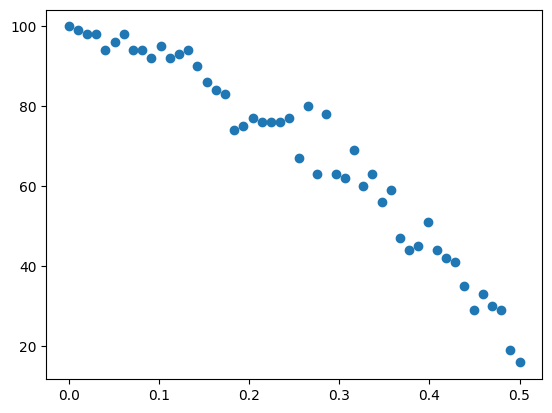

In [32]:
import matplotlib.pyplot as plt

results = np.array(results)
print(results)
plt.scatter(results[:, 0], results[:, 1])